**MACHINE LEARNING PROJECT**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**1. Loading Data**

In [2]:
bnb_df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
bnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
bnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
print(f'Number of rows: {bnb_df.shape[0]}')
print(f'Number of columns: {bnb_df.shape[1]}')

Number of rows: 48895
Number of columns: 16


**1.1 Cleaning Data**

In [7]:
drop_list = ['id', 'host_id', 'host_name', 'last_review', 'name', 'neighbourhood']

In [8]:
bnb_df.drop(drop_list, axis=1, inplace=True)

In [9]:
bnb_df.isna().sum()/bnb_df.shape[0]*100

neighbourhood_group                0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [10]:
# replace the missing values in 'reviews_per_month' with the mean
bnb_df['reviews_per_month'].fillna(bnb_df['reviews_per_month'].mean(), inplace=True)

In [11]:

bnb_df.isna().sum()/bnb_df.shape[0]*100

neighbourhood_group               0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

**1.2 Statistics of the Data**

In [12]:
bnb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,48895.0,1.373221,1.497775,0.01000,0.28000,1.22000,1.580000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


In [13]:
bnb_df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

**2. Exploratory Data Analysis**

I analyzed the distribution of Airbnb listings across New York City’s neighbourhood groups using a bar chart and a pie chart to visualize both the absolute counts and percentage shares.

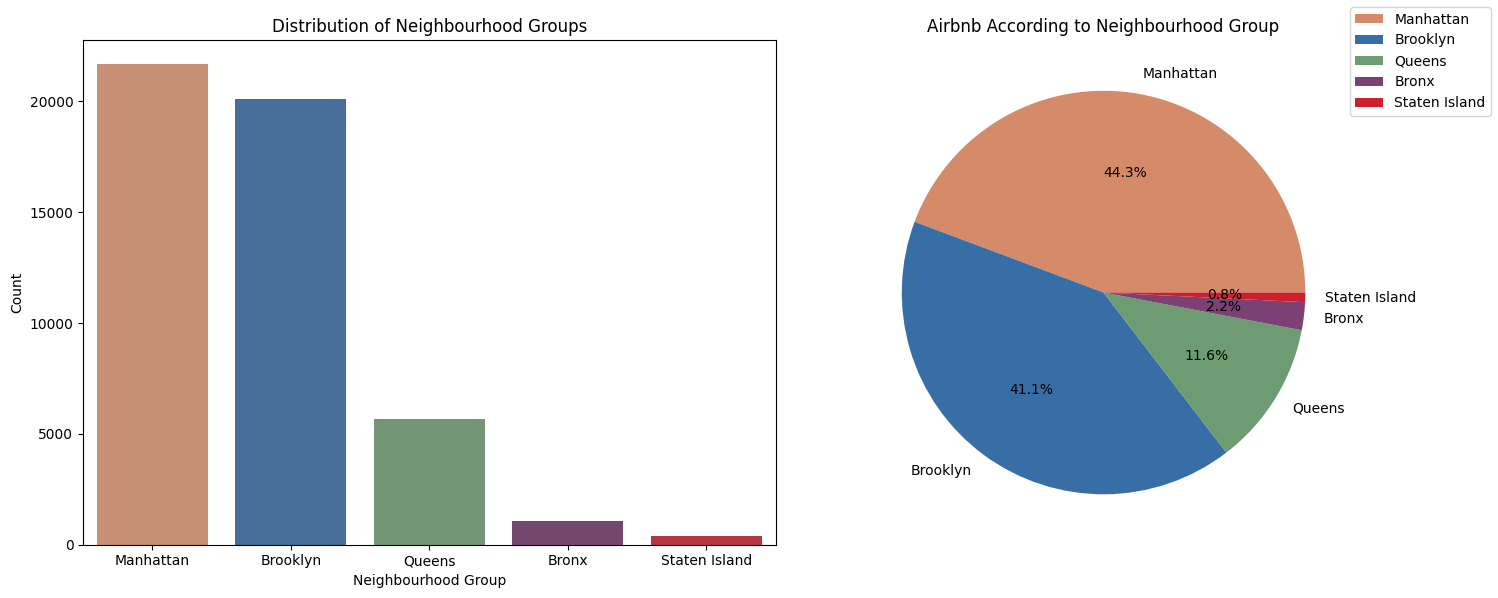

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

labels = bnb_df.neighbourhood_group.value_counts().index
colors = ['#D58B69','#386EA6','#6E9C72','#7B4173','#CD202C']
explode = [0,0,0,0,0]
sizes = bnb_df.neighbourhood_group.value_counts().values

sns.countplot(x='neighbourhood_group', hue='neighbourhood_group',order=labels, data=bnb_df, ax=ax1, palette=dict(zip(labels, colors)))
ax1.set_title('Distribution of Neighbourhood Groups')
ax1.set_xlabel('Neighbourhood Group')
ax1.set_ylabel('Count')

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Airbnb According to Neighbourhood Group')

fig.legend()

plt.tight_layout()
plt.show()

The analysis shows that Manhattan has the highest number of listings, followed by Brooklyn, together accounting for the largest portion of the Airbnb market in the city.

I examined the distribution of Airbnb listings by room type using both a bar chart and a pie chart to show the total counts and percentage of each category.

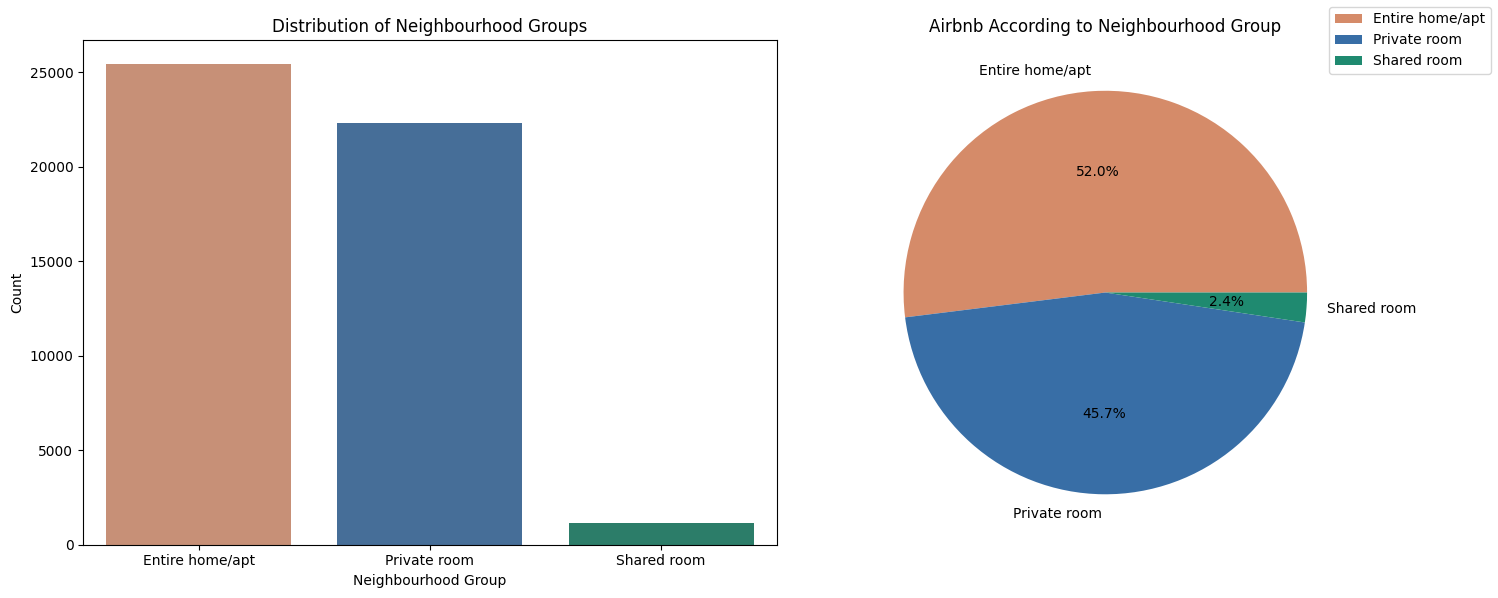

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

labels = bnb_df.room_type.value_counts().index
colors = ['#D58B69','#386EA6','#1F8A70']
explode = [0,0,0]
sizes = bnb_df.room_type.value_counts().values

sns.countplot(x='room_type', hue='room_type', order=labels, data=bnb_df, ax=ax1, palette=dict(zip(labels, colors)))
ax1.set_title('Distribution of Neighbourhood Groups')
ax1.set_xlabel('Neighbourhood Group')
ax1.set_ylabel('Count')

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Airbnb According to Neighbourhood Group')

fig.legend()

plt.tight_layout()
plt.show()

The majority of listings are for entire homes/apartments, followed by private rooms, while shared rooms represent only a small fraction of the market.

I used a violin plot to explore the distribution of Airbnb prices across different neighbourhood groups, focusing on values under $800 to reduce the effect of extreme outliers.

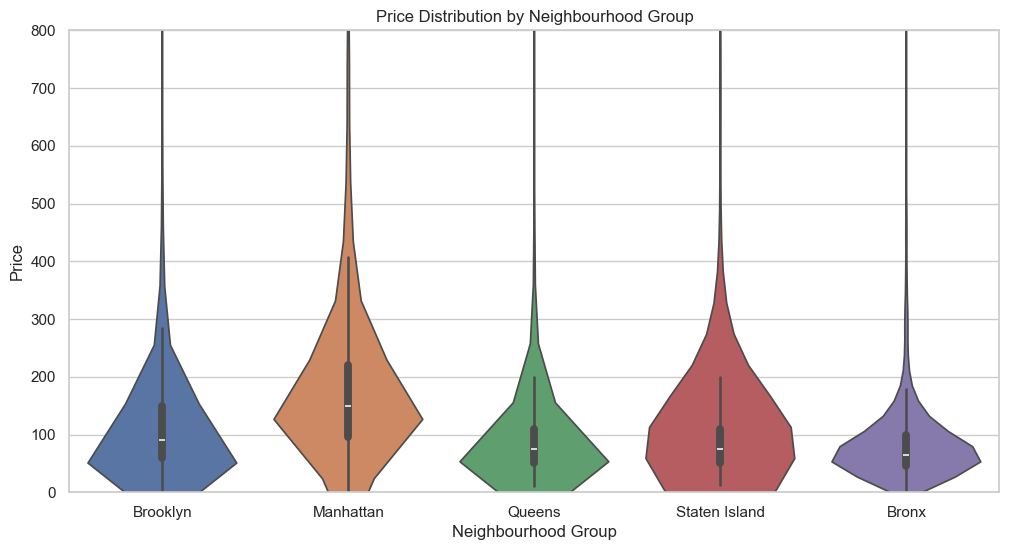

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.violinplot(x='neighbourhood_group', y='price', data=bnb_df, hue='neighbourhood_group')
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.ylim((0,800))
plt.show()

Manhattan shows the highest price range and density, followed by Brooklyn, while Queens, Bronx, and Staten Island tend to have significantly lower prices overall.

A violin plot was used to visualize the price distribution for each room type, focusing on listings under $800 to exclude extreme outliers and highlight general trends

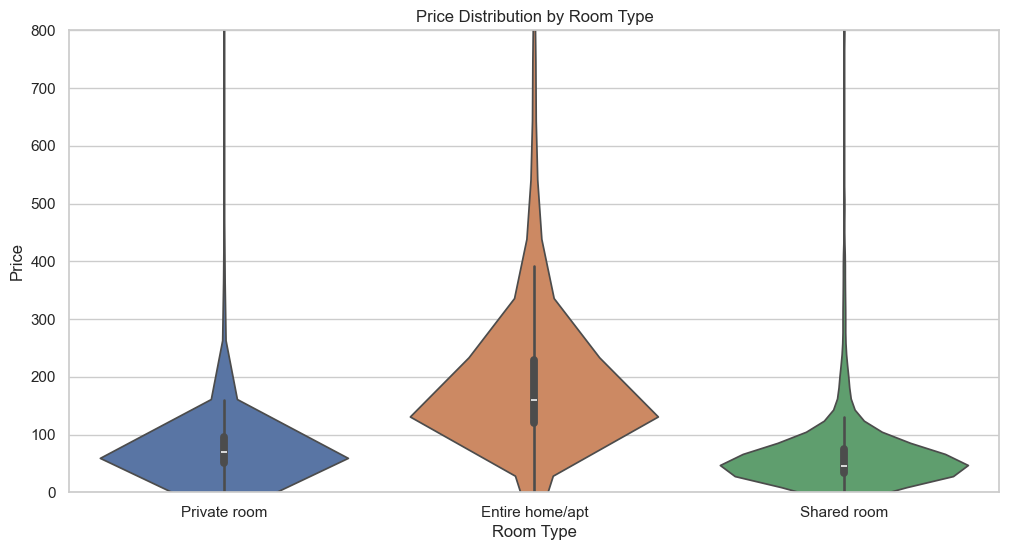

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='room_type', y='price', data=bnb_df, hue='room_type')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type') 
plt.ylabel('Price')
plt.ylim((0,800))
plt.show()

Entire home/apartment listings clearly have the highest price range, while shared rooms are the cheapest. Private rooms fall in between, offering a more affordable option.

I plotted the distribution of Airbnb listing prices to understand how prices are spread across the dataset.

<Figure size 1000x1000 with 0 Axes>

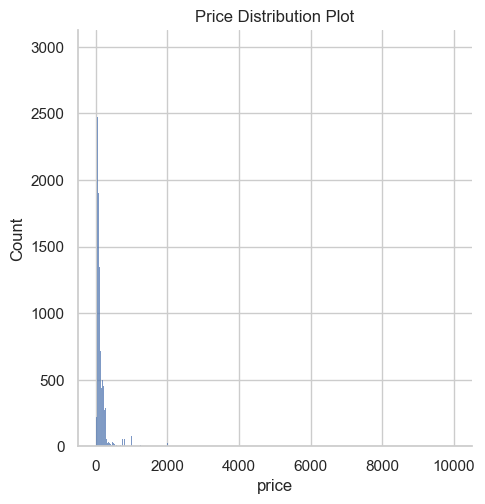

In [25]:
plt.figure(figsize=(10,10))
sns.displot(bnb_df['price'])
plt.title("Price Distribution Plot")
plt.show()

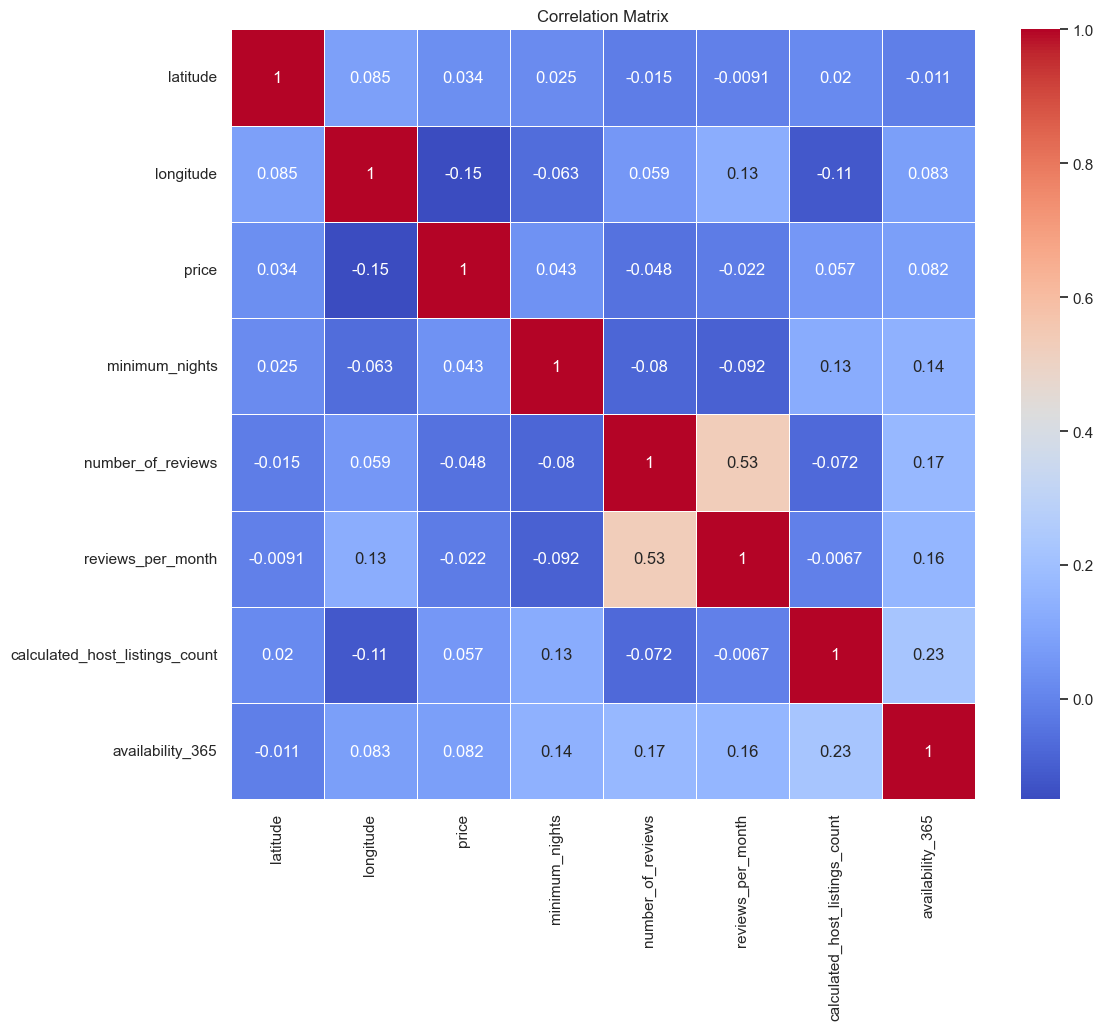

In [18]:
plt.figure(figsize=(12, 10))
corr_matrix = bnb_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

I created a scatter plot to visualize the geographic distribution of Airbnb listings across New York City, using latitude and longitude coordinates colored by neighbourhood group.

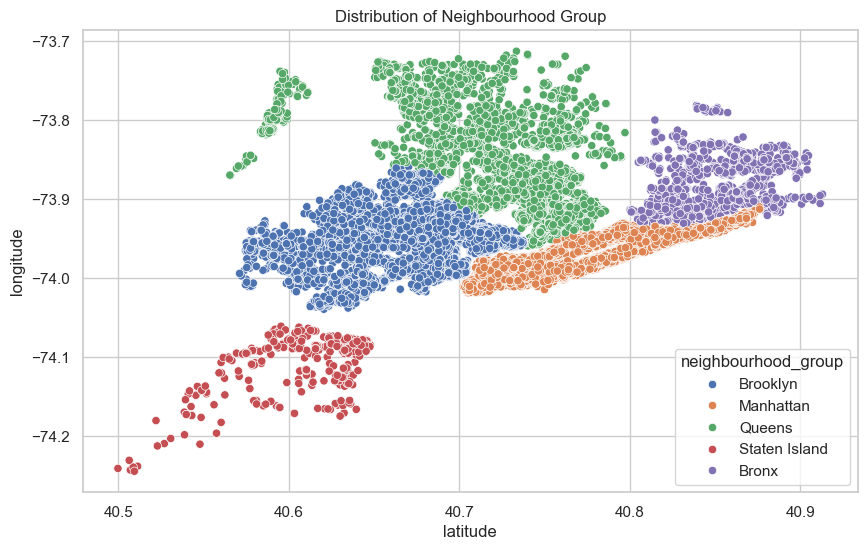

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='latitude', y='longitude', data= bnb_df, hue= 'neighbourhood_group')
plt.title('Distribution of Neighbourhood Group')

plt.show()

You can notice clusters of points, with Manhattan appearing very dense, while Staten Island is more sparsely populated.

I created a scatter plot to visualize the geographic distribution of Airbnb listings across New York City, using latitude and longitude coordinates colored by room type.

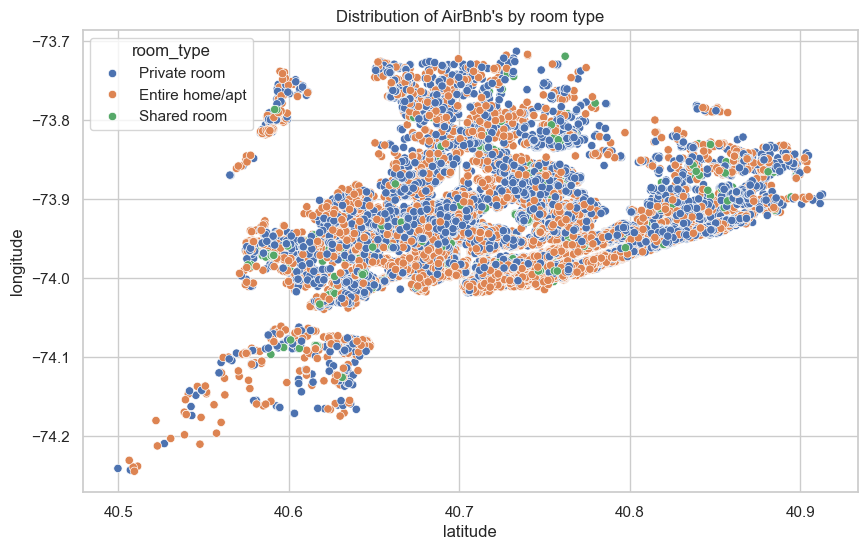

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='latitude', y='longitude', data= bnb_df, hue= 'room_type')
plt.title("Distribution of AirBnb's by room type")

plt.show()

**Machine Learnng**

The aim of this project is to classify whether an Airbnb listing in New York City is an Entire home/apt or not. The columns are divided into two parts: the predictors and the predicted value. The predictor columns include features such as latitude, longitude, price, minimum nights, number of reviews, reviews per month, calculated host listings count, availability_365, and neighbourhood group. The value we want to predict is the type of apartment, converted into a binary variable indicating whether the listing is an entire apartment or not.

We will start with a Random Forest Classifier, then move to a Logistic Regression model, and finally experiment with an XGBoost classifier. At the end, we will compare the performance of the different models using metrics like accuracy, precision, recall, F1-score, and ROC AUC, and determine which model performs best for predicting the type of apartment.

**Import of the libraries**

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

**Prepare the data**

In [32]:
bnb_df['is_entire_home'] = (bnb_df['room_type'] == 'Entire home/apt').astype(int)

In [37]:
X = bnb_df[['latitude', 'longitude', 'price', 'minimum_nights',
        'number_of_reviews', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365', 
        'neighbourhood_group']]
X = pd.get_dummies(X, drop_first=True)  # encoding
y = bnb_df['is_entire_home']
print(X.shape)
print(y.shape)

(48895, 12)
(48895,)


**Divide the dataset into train and test set**

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Create the standardized data**

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

**Model evaluation Class**

This class train and test the selected model and generates the most important metrics:

1. Accuracy: it calculates the fraction of correct prediction
2. Precision: in words, precision answers the question: "Out of all the instances predicted as positive by the model, how many were actually positive?". In particular, it is intuitively the ability of the classifier not to label as positive a sample that is negative. It is particularly important in situations where the cost of false positives (instances predicted as positive but are actually negative) is high, and you want to minimize the chances of making false positive predictions.
3. Recall: in words, recall answers the question: "Out of all the actual positive instances, how many did the model correctly identify?". In particular, it is intuitively the ability of the classifier to find all the positive samples. It is particularly important in situations where the cost of missing positive instances (false negatives) is high, and you want to minimize the chances of false negatives.
4. F1: the F1 score provides a balance between precision and recall. It ranges from 0 to 1 , where 1 indicates perfect precision and recall, and 0 indicates poor performance
5. Precision-Recall Curve: Plotting recall values on the x-axis and corresponding precision values on the y-axis generates a PR curve that illustrates a negative slope function. It represents the trade-off between precision (reducing FPs) and recall (reducing FNs) for a given model.
6. ROC Curve: the ROC curve is drawn by calculating the true positive rate (TPR) and false positive rate (FPR) at every possible threshold, then graphing TPR over FPR. The Area Under the ROC curve (AUC) represents the probability that the model, if given a randomly chosen positive and negative example, will rank the positive higher than the negative.

In [41]:
class Model:
    def __init__(self, model,name=None, scaled=False):
        self.model = model
        self.name = name
        self.scaled = scaled
    def fit(self):
        if self.scaled:
            self.model.fit(X_train_scaled, y_train)
        else:
            self.model.fit(X_train, y_train)
    def __get_predictions(self):
        if self.scaled:
            return self.model.predict(X_test_scaled), self.model.predict_proba(X_test_scaled)[:,1]
        else:
            return self.model.predict(X_test), self.model.predict_proba(X_test)[:,1]
    def get_metrics(self) -> pd.Series:
        y_pred, y_probs = self.__get_predictions()
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        roc_auc = metrics.roc_auc_score(y_test, y_probs)
        conf_mat = metrics.confusion_matrix(y_test, y_pred)
        pr_auc = metrics.average_precision_score(y_test, y_probs)
        metrics_series = pd.Series({
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC AUC': roc_auc,
            'Confusion Matrix': conf_mat,
            'PR AUC': pr_auc,
            'Name': self.name
        })
        if self.name == '' or self.name is None:
            metrics_series.Name =type(self.model).__name__
        return metrics_series
    def visualize_metrics(self):
        y_pred, y_probs = self.__get_predictions()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs)
        roc_auc = metrics.roc_auc_score(y_test, y_probs)
        # Calculate Precision-Recall curve and AUC
        precision, recall, _ = metrics.precision_recall_curve(y_test, y_probs)
        pr_auc = metrics.auc(recall, precision)
        # Plot ROC curve
        plt.figure(figsize=(20, 10))
        plt.subplot(2, 2, 1)
        plt.axis('equal')
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')

        # Plot Precision-Recall curve
        plt.subplot(2, 2, 2)
        plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc='lower left')

        residuals = y_test - y_probs
        # Plot Confusion Matrix and Distribution of errors
        plt.subplot(2, 2, 3)
        conf_mat = metrics.confusion_matrix(y_test, y_pred)
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.subplot(2, 2, 4)
        sns.histplot(residuals, bins=30, edgecolor='black', kde=True)
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title('Distribution of Errors')
        plt.show()
    
    

In [44]:
models_df = pd.DataFrame(columns=['Name',
    'Accuracy',
            'Precision',
            'Recall',
            'F1-Score',
            'ROC AUC',
            'Confusion Matrix',
            'PR AUC'])

**Linear Discriminant Analysis (LDA)**

A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule. In particular, the model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix. It also assumes that the data is linearly separable, meaning that a linear decision boundary can accurately classify the different classes.

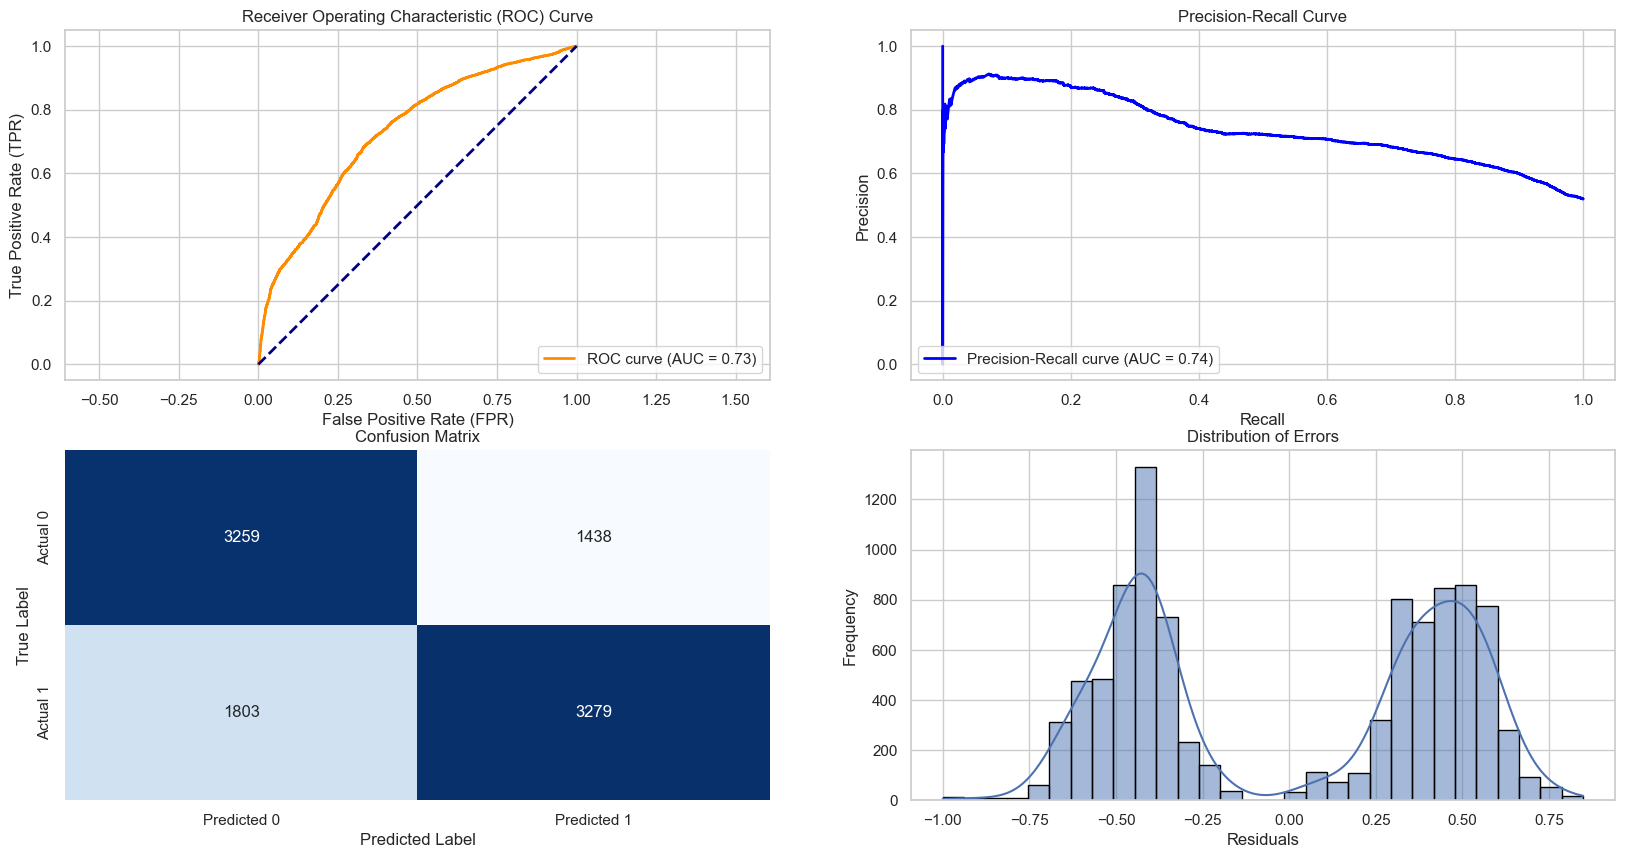

In [42]:
model = Model(LinearDiscriminantAnalysis())
model.fit()
model.visualize_metrics()

In [45]:
metrics_LDA = model.get_metrics()
models_df = pd.concat([models_df, metrics_LDA.to_frame().T])
print(metrics_LDA)

Accuracy                                0.668576
Precision                               0.695145
Recall                                  0.645218
F1-Score                                0.669252
ROC AUC                                 0.730119
Confusion Matrix    [[3259, 1438], [1803, 3279]]
PR AUC                                  0.738774
Name                  LinearDiscriminantAnalysis
dtype: object


**Naive Bayes (Gaussian)**

Naive Bayes is a family of probabilistic algorithms based on Bayes' theorem, which is a fundamental theorem in probability theory. It's based on:

- Bayes' Theorem which calculates the probability of a hypothesis given the observed evidence.
- Independence Assumption: features must be independent from each other

There are a lot of different Naive Bayes algorithms which are based on the distribution of the data. Recalling the fact that 4 of the features follows a normal distribution and from previous calculation we've determined that there is not a lot of dependency between the features so I've decided to use the Gaussian NB algorithm

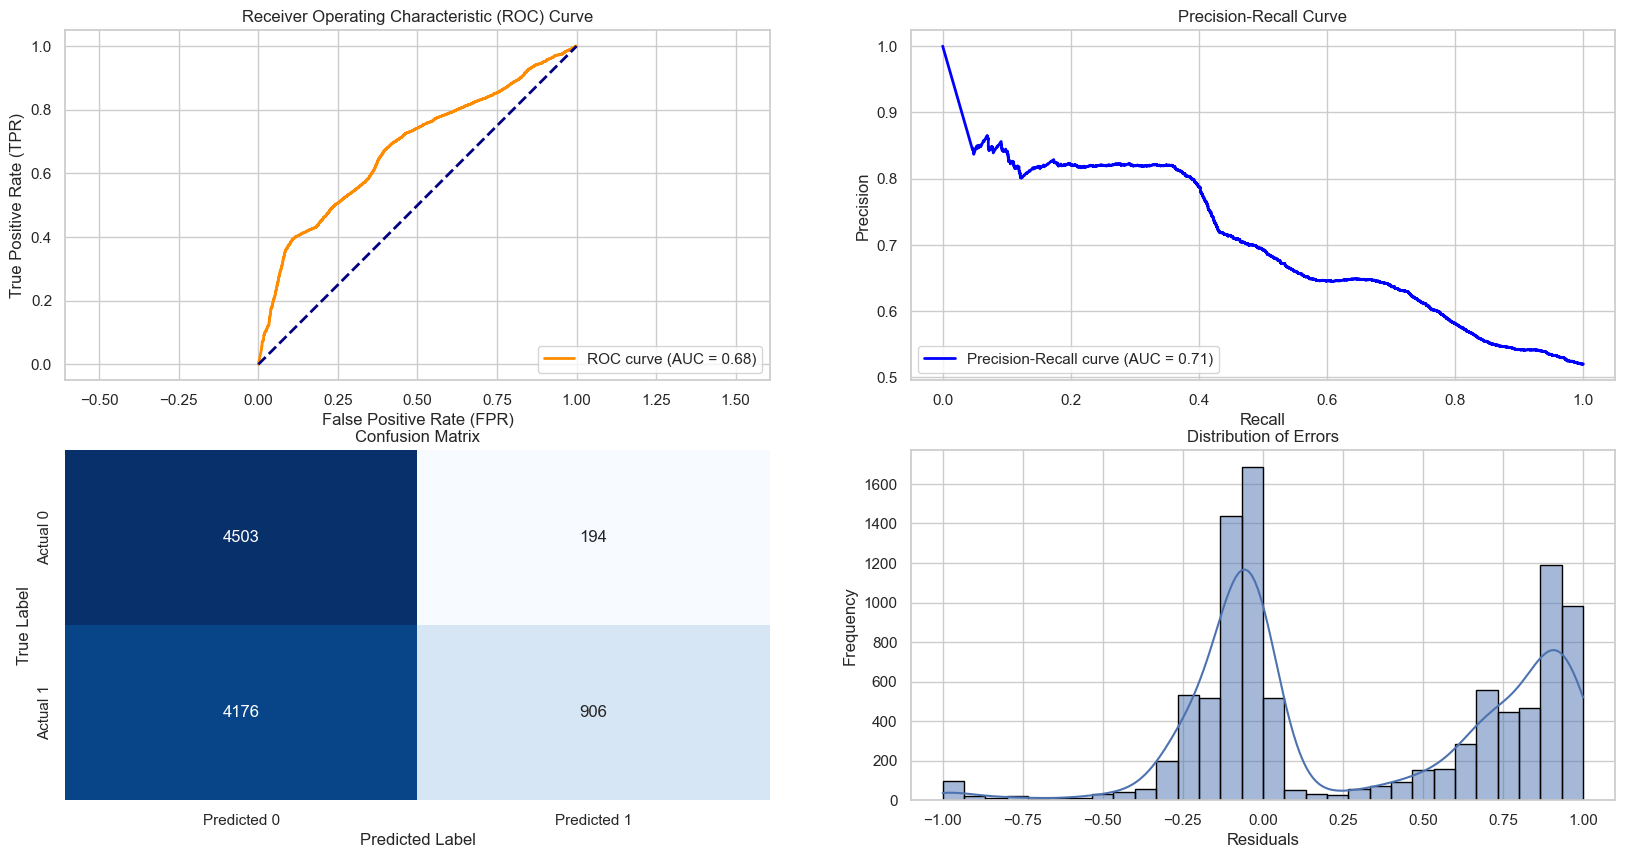

In [46]:
model = Model(GaussianNB(), name='Gaussian Naive Bayes')
model.fit()
model.visualize_metrics()

In [47]:
metrics_NB = model.get_metrics()
models_df = pd.concat([models_df, metrics_NB.to_frame().T])
print(metrics_NB)

Accuracy                              0.553124
Precision                             0.823636
Recall                                0.178276
F1-Score                              0.293109
ROC AUC                               0.677734
Confusion Matrix    [[4503, 194], [4176, 906]]
PR AUC                                0.703172
Name                      Gaussian Naive Bayes
dtype: object


**Logistic Regression**

Logistic regression is a statistical method used for binary classification, which means predicting the probability that an instance belongs to one of two classes. Despite its name, logistic regression is primarily employed for classification tasks rather than regression.

In logistic regression, the logistic function, also known as the sigmoid function, is used to model the relationship between the independent variables and the probability of the dependent variable belonging to a particular class. The output of the logistic regression model is a probability score between 0 and 1, and a threshold is typically applied to classify instances into one of the two classes.

The logistic regression model assumes a linear relationship between the independent variables and the log-odds of the probability of the dependent variable. The model is trained by adjusting the weights of the independent variables through an optimization process, often using techniques like maximum likelihood estimation.

C:\Users\Utente\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


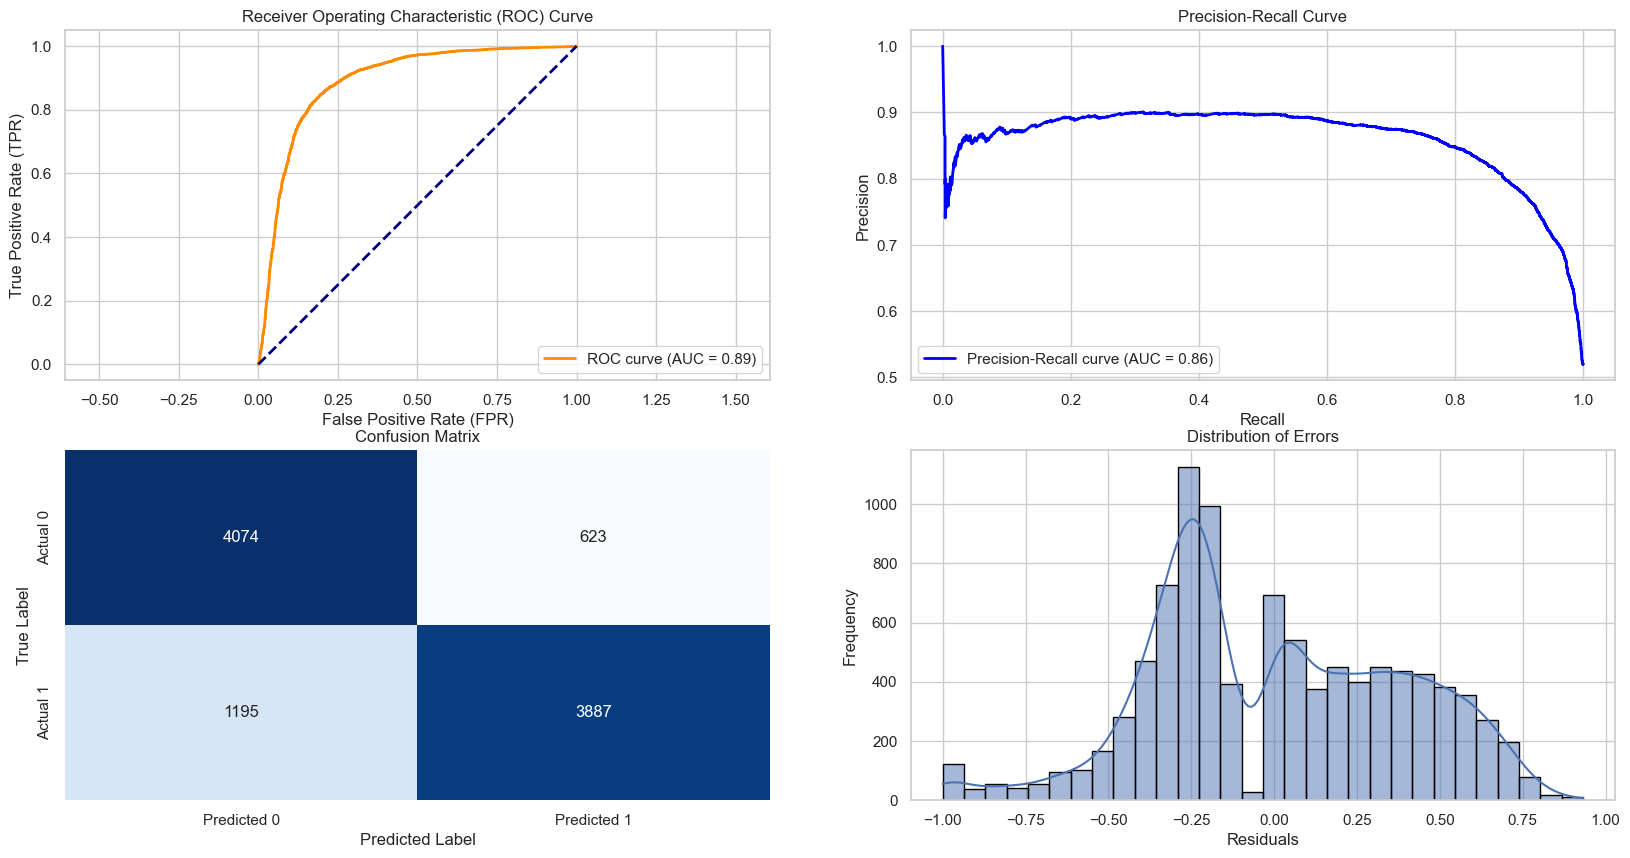

In [49]:
model = Model(LogisticRegression(), name='Logistic Regression')
model.fit()
model.visualize_metrics()

In [50]:
metrics_LR = model.get_metrics()
models_df = pd.concat([models_df, metrics_LR.to_frame().T])
print(metrics_LR)

Accuracy                               0.814091
Precision                              0.861863
Recall                                 0.764856
F1-Score                               0.810467
ROC AUC                                0.888545
Confusion Matrix    [[4074, 623], [1195, 3887]]
PR AUC                                 0.858215
Name                        Logistic Regression
dtype: object


**Decision Tree Classifier**

In this case, but also in others, I preferred to use RandomizedSearchCV. Its concept is the same of GridSearchCV, but it is faster. In fact, in contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions.

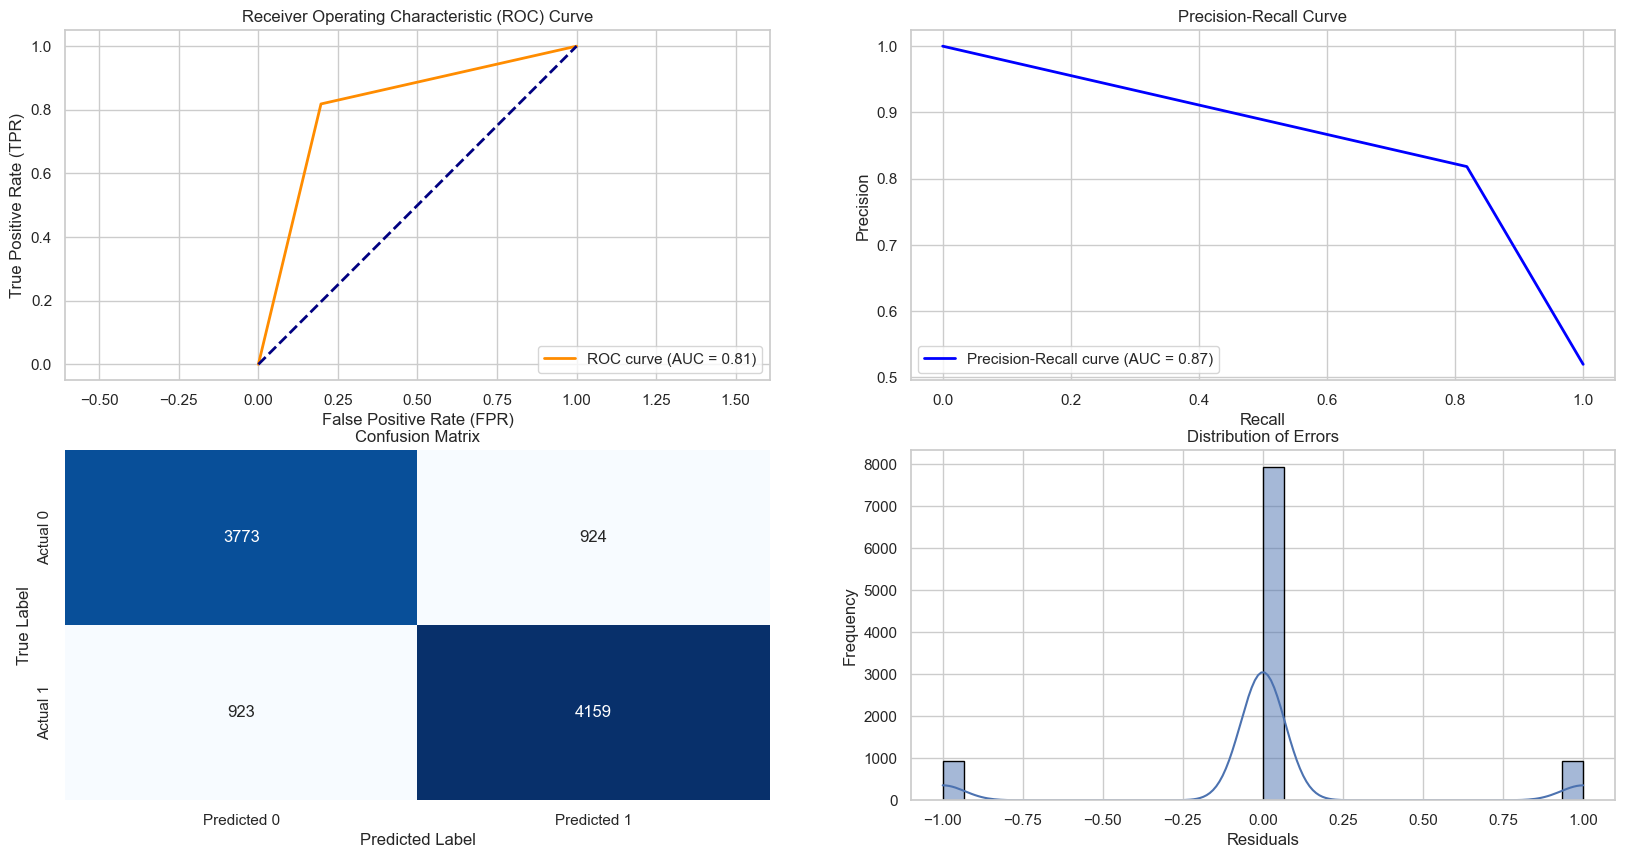

In [51]:
model = Model(DecisionTreeClassifier(), 'Decision Tree Classifier')
model.fit()
model.visualize_metrics()

In [52]:
metrics_DT = model.get_metrics()
models_df = pd.concat([models_df, metrics_DT.to_frame().T])
print(metrics_DT)

Accuracy                              0.811126
Precision                             0.818218
Recall                                0.818379
F1-Score                              0.818298
ROC AUC                               0.810829
Confusion Matrix    [[3773, 924], [923, 4159]]
PR AUC                                0.763998
Name                  Decision Tree Classifier
dtype: object


**Scaled**

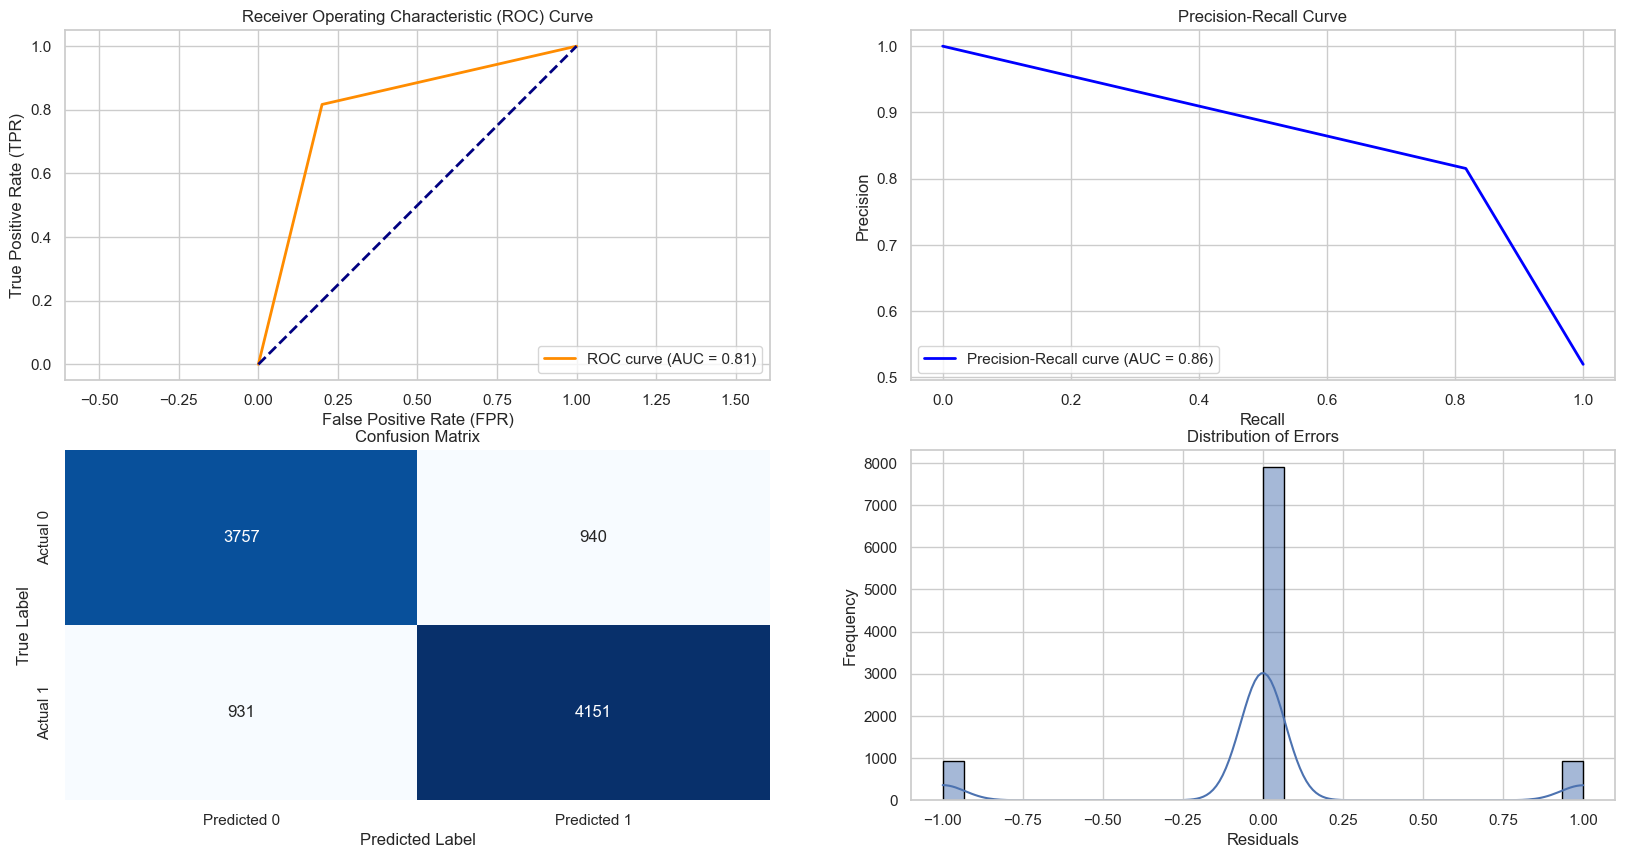

In [53]:
model = Model(DecisionTreeClassifier(), 'Decision Tree Classifier Scaled', scaled=True)
model.fit()
model.visualize_metrics()

In [54]:
metrics_DT = model.get_metrics()
models_df = pd.concat([models_df, metrics_DT.to_frame().T])
print(metrics_DT)

Accuracy                                   0.808672
Precision                                   0.81536
Recall                                     0.816804
F1-Score                                   0.816082
ROC AUC                                    0.808338
Confusion Matrix         [[3757, 940], [931, 4151]]
PR AUC                                     0.761194
Name                Decision Tree Classifier Scaled
dtype: object


**Best Model**

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = {
    'max_depth': [None, 5, 10, 15,20, 25],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the model to the data (search for the best hyperparameters)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

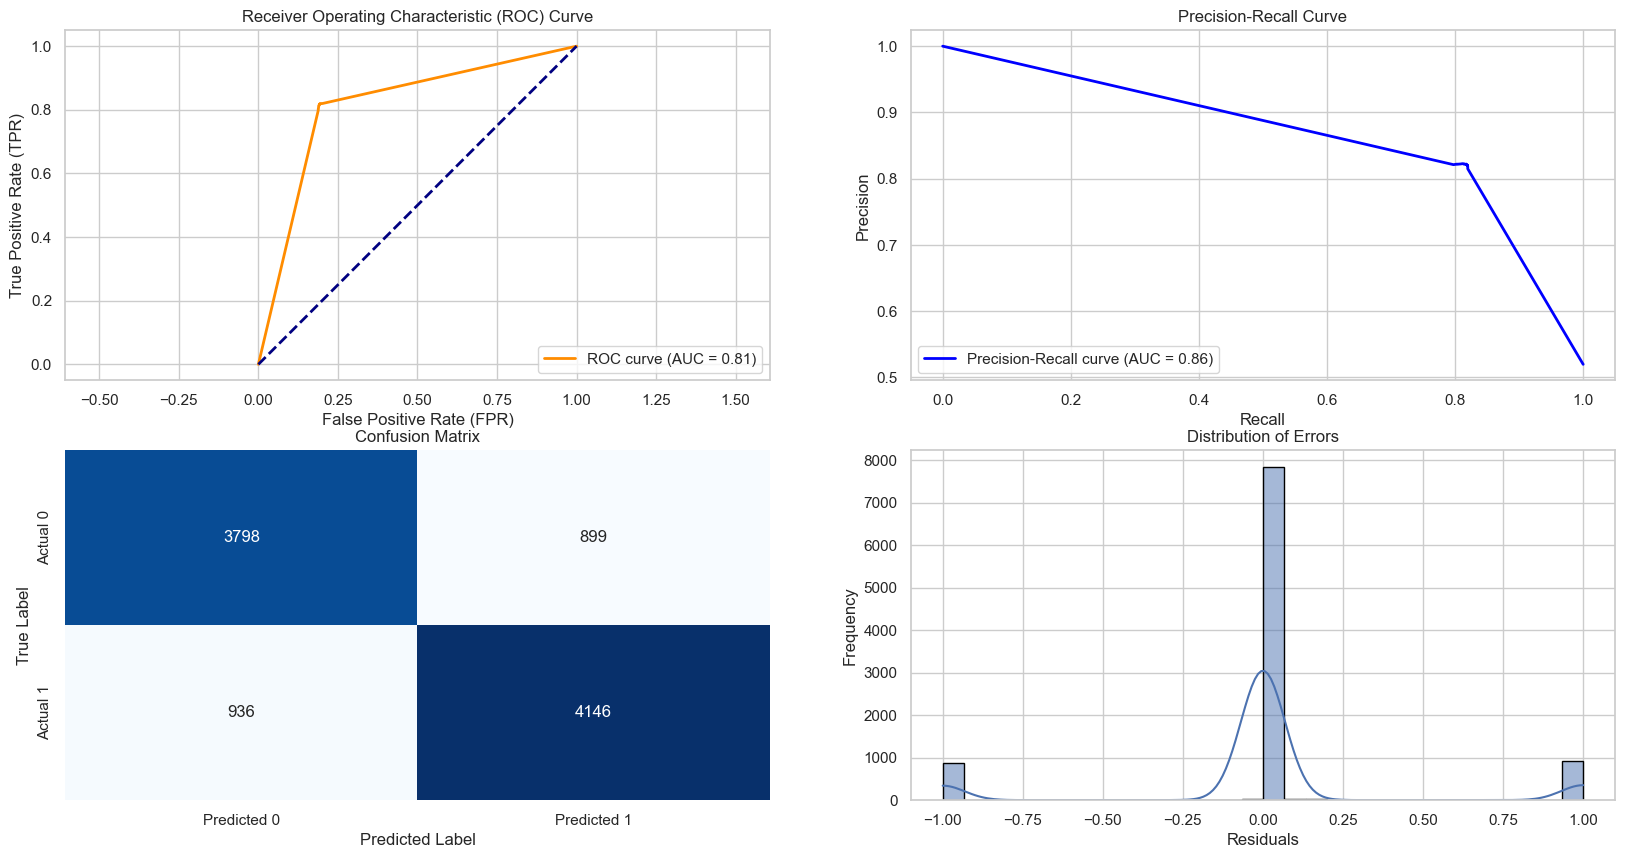

In [59]:
#{'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}
model = Model(DecisionTreeClassifier(criterion='gini',max_depth=25, min_samples_leaf=1, min_samples_split=2), name='Grid Search Decision Tree Classifier')
model.fit()
model.visualize_metrics()

In [60]:
metrics_DT_Best = model.get_metrics()
models_df = pd.concat([models_df, metrics_DT_Best.to_frame().T])
print(metrics_DT_Best)

Accuracy                                        0.812353
Precision                                       0.821804
Recall                                          0.815821
F1-Score                                        0.818801
ROC AUC                                         0.812544
Confusion Matrix              [[3798, 899], [936, 4146]]
PR AUC                                          0.766798
Name                Grid Search Decision Tree Classifier
dtype: object


**SVC**

Support Vector Machines (SVM) are a class of supervised learning algorithms used for both classification and regression tasks. The Support Vector Classification (SVC) model is specifically designed for classification problems. In SVC, the algorithm aims to find a hyperplane in a high-dimensional space that best separates the data into different classes. The term "support vector" refers to the data points that lie closest to the decision boundary (hyperplane), and these vectors play a crucial role in determining the optimal separation. The Key concepts are:

- Hyperplane: The decision boundary that separates the data points belonging to different classes. In a two-dimensional space, a hyperplane is a line; in higher dimensions, it becomes a hyperplane.
- Support Vectors: Data points that are closest to the hyperplane and influence the position and orientation of the decision boundary.
- Margin: The distance between the hyperplane and the nearest support vectors. A larger margin indicates a more robust separation.
- Kernel Trick: SVC can efficiently handle non-linear relationships in the data by using a kernel function to map the input data into a higher-dimensional space.